# K Nearest Neighbours

KNN is a simple classification algorithm. It classifies cases based on a similarity measure relying on the labels belonging to the K nearest points in the training set. In that sense, it is actually quite easy to code yourself. In this notebook, we will take you through a set of functions that calculate the neirest neighbours, but will also show you how to do it with Scikit-Learn. Let's start with importing the required libraries for this exercise.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors as neigh
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import operator
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import preprocessing

%matplotlib inline  

Let's define all the functions we need to implement KNN classification algorithm. Don't worry if these functions seem a bit complex to you in terms of code, we won't ask you to replicate it, it's just for showing you step by step how the KNN algorithm works. 

Let's start by calculating the distance between two data instances.

#### Define Euclidean Distance: 

In [2]:
def euclideanDistance(instance1, instance2):
    length = len(instance1)
    # you can also check if instance1 and instance2 have the same length
    distance = 0
    for l in range(length):
        distance += (instance1[l] - instance2[l])**2
    return math.sqrt(distance)

For example:

In [3]:
data1 = [0,1,2]
data2 = [0,2,4]
distance = euclideanDistance(data1, data2)
print ('Distance: ', distance)

Distance:  2.23606797749979


Let's define a function to get the K nearest neighbors of a point in a set.

In [4]:
def getNeighbors(data, labels, testInstance, K):
    distances = []
    neighbors = {}
    #Finds the distances between all the points and creates a list of tuples.
    for i in range(len(data)):
        dist = euclideanDistance(testInstance, data[i, :])
        distances.append([data[i,:], dist])

    #Sorts the list of distances by using the second element of the tuple, i.e. the distance    

    idx = np.argsort(np.array(distances)[:, 1])
    neighbors_data = data[idx]
    neighbors_label = labels[idx]
    
    neighbors =  {'data': neighbors_data[:K], 'labels': neighbors_label[:K]}
    return neighbors


For example:

In [5]:
# define the training set: 2 points and 2 labels
data = np.array([[2, 2, 2], [4, 4, 4]])
labels = np.array([0, 1])

# define the test instance
testInstance = [5, 5, 5]

# choose the number of neighbours
K = 1

# find & retrieve the K nearest points to the test instance, sorted by the distance
neighbors = getNeighbors(data, labels, testInstance, K)
print(neighbors)

{'data': array([[4, 4, 4]]), 'labels': array([1])}


Let's define a Response function: this counts the number of times a certain class appears in the set of neighbours that we've found with the previous function. The class with the highest frequency will be the label assigned to the test instance.

In [6]:
def getResponse(neighbors):
    classVotes = {}
    #Assign the votes for every class
    for i in range(len(neighbors)):
        response = neighbors[i]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    
    #Use the dictionary to short which class has the most votes
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print sortedVotes
    return sortedVotes[0][0]

For example:

In [7]:
# in this case we have two 1s and one 0: class 1 wins.
neighbors['labels'] = np.array([1, 1, 0])
response = getResponse(neighbors['labels'])
print(response)

1


Let's calculate the accuracy of our model: This should be a familiar concept by now, it is a way to test the performance of the model.

In [8]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        #If the label of the testSet and the prediction are the same add one.
        if testSet[i] == predictions[i]:
            correct += 1
    return (float(correct)/float(len(testSet))) * 100.0

For example:

In [9]:
# true labels
testSet = np.array(['a','a','b'])

# predicted labels
predictions = ['a', 'a', 'a']

accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


**Exercise:** <br> Assign a label to the test instance, basing on the following training set:

In [29]:
training_set = np.array([[1, 1, 1], [1, 3, 5], [7, 5, 4], [9, 5, 3]])
training_labels = np.array([1, 2, 1, 2])
test_instance = np.array([4, 4, 4])

# get K neighbours
K = #TYPEHERE
neighbours = #TYPEHERE

# get the label
label = #TYPEHERE

print label

# what about the accuracy?

1


### And now, with real data

At this point, we have all the tools we need to classify data. Now we want to test the algorithm over real data. For that we will use a dataset containing information on wines. What our algorithm can is do is to predict the origin of the wine, by its chemical characteristics. For all you Oenophiles (https://en.wikipedia.org/wiki/Oenophilia) out there: who wouldn't love a wine classifier tool, right!? 

The data is the result of chemical analysis of wines grown in the same region in Tuscany, Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

Our data consists of the following features and classes:

The attributes are: 

1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

The classes are given under the variables "Class" and "Origin" and are respectively:

1. from Siena 
2. from Lucca
3. from Pisa

Cheers!

In [11]:
data=pd.read_csv('wine_data.csv')
data.head()

,Class,Origin,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,Siena,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Siena,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Siena,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Siena,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Siena,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
data.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Let's have a look at how our classes are divived. This is always important to do in classifications problems. We would ideally like each of our classes to be quite equal in size, otherwise we would have to address a problem of unbalanced classes. So let's create a bar chart of our classes, we'll take the variable 'Origin' but we could do the same with 'Class', as they're just the numeric and string representation of our classes. 

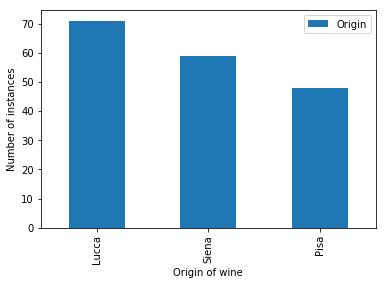

In [13]:
wineorigin=pd.DataFrame(data['Origin'].value_counts())
plt.figure()
wineorigin.plot(kind='bar')
plt.xlabel('Origin of wine')
plt.ylabel('Number of instances')

So...Do you think these classes are unbalanced?

Now to test the algorithm, we first need to split the data into training and test set, and convert the parts to Numpy array, just like we've done before. We can use "Class" for train_Y and the rest of the variables, without "Origin" for train_X.

In [14]:
train, test = train_test_split(data, train_size = 0.7)

train_X = np.array(train)[:, 2:].astype(float)
train_Y = np.array(train)[:,0].astype(float)

test_X = np.array(test)[:, 2:].astype(float)
test_Y = np.array(test)[:,0].astype(float)

Great, now that our data is split into train and test data, let's rerun our own defined 1 - NN algorithm on our data, using the functions we created earlier:

In [15]:
predictions=[]
K = 1
for i in range(len(test_Y)):
    neighbors = getNeighbors(train_X, train_Y, test_X[i,:], K)
    result = getResponse(neighbors['labels'])
    predictions.append(result)
accuracy = getAccuracy(test_Y, predictions)
print ('Accuracy: ', accuracy, '%')

Accuracy:  72.22222222222221 %


But to make things easier, we can actually also use the sklearn library, let's see what this does:

In [16]:
clf = neigh.KNeighborsClassifier(K)
clf.fit(train_X, train_Y)

predictions1 = clf.predict(test_X)

accuracy = getAccuracy(test_Y, predictions1)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 72.22222222222221%


### Normalizing data

If we have a look at the values in the data, we can see that they have different orders of magnitude for different features. Let's work our feature scaling magic and do a short exercise to scale our train_X set to make the different features better aligned.  

In [17]:
data.head()

,Class,Origin,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,Siena,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Siena,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Siena,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Siena,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Siena,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Exercise:** <br> Can you scale the train_X feature set using the mean and standard deviation for train_X and this relation: 

$$ScaledX = \frac{X - mean}{std}$$

In [21]:
# compute mean and standard deviation of training set
mean = # TYPE HERE use numpy
std = # TYPE HERE 

#Hint, you might want to use the option "axis=0" when you calculate mean and std, as you want to tell python to calculate your numbers over columns, not over rows

# now scale test set using the mean and std of the training set
train_Xscaled = # TYPE HERE 
test_Xscaled = # TYPE HERE 

In [23]:
K = 1
clf = neigh.KNeighborsClassifier(K)
clf.fit(train_Xscaled, train_Y)

predictions = clf.predict(test_Xscaled)

accuracy = getAccuracy(test_Y, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 94.44444444444444%


We can also investigate other metrics, such as: 

In [24]:
print(sklearn.metrics.classification_report(test_Y, predictions))

             precision    recall  f1-score   support

        1.0       0.90      1.00      0.95        18
        2.0       1.00      0.82      0.90        17
        3.0       0.95      1.00      0.97        19

avg / total       0.95      0.94      0.94        54



We can also try setting weights (i.e. using the distance of neighbours to weigh their relative importance), and see if our performance increases.

In [25]:
K = 1
clf = neigh.KNeighborsClassifier(K, weights='distance')
clf.fit(train_X, train_Y)

predictions = clf.predict(test_X)

# accuracy = getAccuracy(test_Y, predictions)
accuracy = sklearn.metrics.accuracy_score(test_Y, predictions)*100
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 72.222222222222214%


What happens if we increase the  number of neighbours taken into account? We can plot the accuracy accordingly.

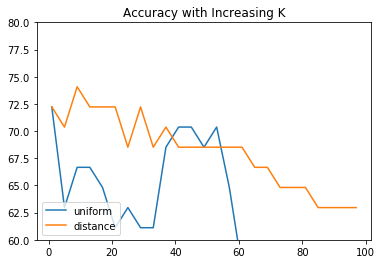

In [26]:
def plotvector(train_X, train_Y, test_X, test_Y, weights, upperLim = 100):
    results = []
    for k in range(1, upperLim, 4):
        clf = neigh.KNeighborsClassifier(n_neighbors = k, weights = weights)
        clf = clf.fit(train_X, train_Y)
        preds = clf.predict(test_X)
        accuracy = clf.score(test_X, test_Y)
        results.append([k, accuracy*100])
 
    results = np.array(results)
    return(results)

pltvector1 = plotvector(train_X, train_Y, test_X, test_Y, weights = "uniform")
pltvector2 = plotvector(train_X, train_Y, test_X, test_Y,  weights = "distance")
line1 = plt.plot(pltvector1[:,0], pltvector1[:,1], label = "uniform")
line2 = plt.plot(pltvector2[:,0], pltvector2[:,1], label = "distance")
plt.legend(loc=3)
plt.ylim(60, 80)
plt.title("Accuracy with Increasing K")
plt.show()

We can also do a step of feature selection, in order to maintain only the most descriptive features. More specifically, the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets. Univariate feature selection works by selecting the best features based on univariate statistical tests.

First, we select the optimal number of features, through cross validation:

Optimal percentil: [9]
Mean scores: [ 0.61335117  0.61335117  0.84575251  0.84575251  0.90983278  0.92822742
  0.92822742  0.95922408  0.95922408  0.97661538  0.95991973  0.95991973
  0.95161204  0.95161204  0.92622074  0.94991304  0.94991304  0.93422074
  0.93422074  0.9586087 ]


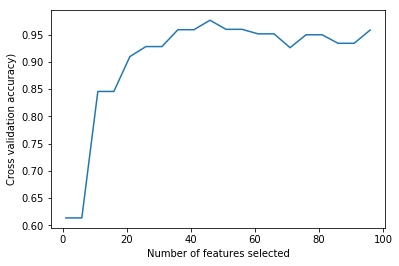

In [27]:
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(sklearn.feature_selection.f_classif, percentile=i)
    X_train_fs = fs.fit_transform(train_Xscaled, train_Y)
    scores = cross_val_score(clf, X_train_fs, train_Y, cv=5)
    results = np.append(results, scores.mean())

optimal_percentil = np.where(results == results.max())[0]
if len(optimal_percentil)>1:
    optimal_percentil=optimal_percentil[0]
#print ("Optimal percentil :{0}",format(percentiles[optimal_percentil]), "\n")

print ("Optimal percentil:",optimal_percentil)

# Plot number of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation accuracy)")
pl.plot(percentiles,results)
print ("Mean scores:",results)


Then, we select the relevant features and we repeat the KNN algorithm with the transformed data:

In [ ]:
fs = sklearn.feature_selection.SelectPercentile(sklearn.feature_selection.f_classif, percentile=percentiles[optimal_percentil])
X_train_fs = fs.fit_transform(train_Xscaled, train_Y)

clf = sklearn.neighbors.KNeighborsClassifier(5)

clf.fit(X_train_fs, train_Y)
X_test_fs = fs.transform(test_Xscaled)
predictions = clf.predict(X_test_fs)

accuracy = getAccuracy(test_Y, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

What happens to accuracy if we change the ratio between training and test set?

## Answers to the Exercises

**Exercise:** <br> Assign a label to the test instance, basing on the following training set:

In [ ]:
# get K neighbours
K = 1
neighbours = getNeighbors(training_set, training_labels, testInstance, K)

# get the label
label = getResponse(neighbours['labels'])

print (label)

**Exercise:** <br> Can you scale the train_X feature set using the mean and standard deviation for train_X and this relation: 

$$ScaledX = \frac{X - mean}{std}$$

In [ ]:
# compute mean and standard deviation of training set
mean = np.mean(train_X, axis=0)
std = np.std(train_X, axis=0)

# note that we scale test set using the mean and std of the training set
train_Xscaled = (train_X-mean)/std
test_Xscaled = (test_X-mean)/std